In [1]:
import jax
%load_ext autoreload
%autoreload 2
jax.Device = jax.xla.Device # Need this for gpjax to work on my device, comment if not necessary
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import partial
import gpjax as gpx
import jax.random as jr
from jaxutils import Dataset
import jaxkern as jk
from jax import jit
import optax as ox
from pprint import PrettyPrinter
from bas_functions.gp_safety_function import GP_Safety
from systems_dynamics.double_integrator import DoubleIntegrator
from costs.quadratic_cost_penalty_method import QuadraticCostPenaltyMethod
from costs.stochastic_barrier_cost import StochasticBarrierCost
from ddp_algorithms.tdbas_pdp import TDBAS_PDP
from bas_functions import bas_dynamics
from bas_functions import embed_dynamics


pp = PrettyPrinter(indent=4)
key = jr.PRNGKey(345)



ModuleNotFoundError: No module named 'gpjax'

In [2]:
""" Define safety constraints (function h), generate BaS and embed into dynamics"""
obs_array = np.array([[1.5,1,1],[-1.5,-1.,1]])
def h_(x, k, obs_array):
    px, py = x[0:2]
    return ((px-obs_array[:,0])**2 + (py-obs_array[:,1])**2 - obs_array[:,2]**2).reshape(-1)
    # return (jnp.sqrt((px-obs_array[:,0])**2 + (py-obs_array[:,1])**2) - obs_array[:,2]).reshape(-1)

h = partial(h_, **{'obs_array': obs_array})
hmap = jax.vmap(h, in_axes=(0,None))
n_dim = 2

In [3]:
gp_h = GP_Safety(h, 2,  x_lower = jnp.array([-3,-3]), x_upper = jnp.array([3,3]), n_samples=50)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

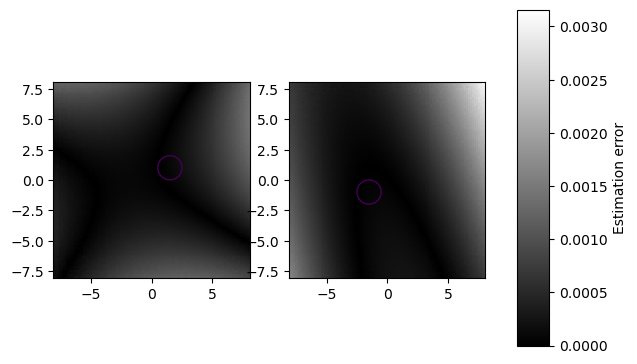

In [4]:
# with jax.disable_jit(True):
fig, ax = gp_h.test_estimation_2d(res=100)
plt.show()